In [1]:
import matplotlib
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from sklearn.model_selection import train_test_split

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)    
matplotlib.rcParams['axes.unicode_minus'] = False      
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', 150)

from xgboost import XGBRegressor

random_seed = 616

# 데이터 불러오기

In [2]:
data = pd.read_excel('data/01_제공데이터/2021 빅콘테스트_데이터분석분야_퓨처스리그_홍수ZERO_댐유입량,강우,수위데이터_210803.xlsx', header=[0,1])
data.columns = ['_'.join(col).strip() if "Unnamed" not in col[1] else col[0] for col in data.columns.values]

In [3]:
data.head()

,홍수사상번호,연,월,일,시간,유입량,데이터집단 1_유역평균강수,데이터집단 1_강우(A지역),데이터집단 1_강우(B지역),데이터집단 1_강우(C지역),데이터집단 1_강우(D지역),데이터집단 1_수위(E지역),데이터집단 1_수위(D지역),데이터집단 2_유역평균강수,데이터집단 2_강우(A지역),데이터집단 2_강우(B지역),데이터집단 2_강우(C지역),데이터집단 2_강우(D지역),데이터집단 2_수위(E지역),데이터집단 2_수위(D지역),데이터집단 3_유역평균강수,데이터집단 3_강우(A지역),데이터집단 3_강우(B지역),데이터집단 3_강우(C지역),데이터집단 3_강우(D지역),데이터집단 3_수위(E지역),데이터집단 3_수위(D지역),데이터 집단 4_유역평균강수,데이터 집단 4_강우(A지역),데이터 집단 4_강우(B지역),데이터 집단 4_강우(C지역),데이터 집단 4_강우(D지역),데이터 집단 4_수위(E지역),데이터 집단 4_수위(D지역),데이터 집단 5_유역평균강수,데이터 집단 5_강우(A지역),데이터 집단 5_강우(B지역),데이터 집단 5_강우(C지역),데이터 집단 5_강우(D지역),데이터 집단 5_수위(E지역),데이터 집단 5_수위(D지역),데이터 집단 6_유역평균강수,데이터 집단 6_강우(A지역),데이터 집단 6_강우(B지역),데이터 집단 6_강우(C지역),데이터 집단 6_강우(D지역),데이터 집단 6_수위(E지역),데이터 집단 6_수위(D지역)
0,1,2006,7,10,8,189.10,6.40,7,7,7,8,2.54,122.57,6.30,7,7,7,8,2.54,122.54,6.30,7,7,7,8,2.54,122.55,6.40,7,7,8,8,2.54,122.67,6.40,7,7,8,8,2.54,122.66,6.40,7,7,8,8,2.54,122.61
1,1,2006,7,10,9,216.95,6.30,7,8,7,8,2.53,122.56,6.40,7,8,7,8,2.53,122.55,6.40,7,8,7,8,2.53,122.56,7.30,7,8,10,10,2.53,122.67,7.30,7,8,10,10,2.53,122.65,7.30,7,8,10,10,2.53,122.60
2,1,2006,7,10,10,251.42,6.40,7,9,7,8,2.53,122.56,7.30,7,9,7,8,2.53,122.56,7.30,7,9,8,8,2.53,122.57,8.20,7,9,10,11,2.53,122.66,8.20,7,9,10,11,2.53,122.64,8.20,7,9,10,11,2.53,122.59
3,1,2006,7,10,11,302.81,7.30,7,10,7,8,2.53,122.56,8.20,7,10,8,8,2.53,122.57,8.20,7,10,10,10,2.53,122.58,11.30,9,10,15,14,2.53,122.65,11.30,9,10,15,14,2.53,122.62,11.30,9,10,15,14,2.53,122.58
4,1,2006,7,10,12,384.78,8.20,7,12,8,10,2.53,122.56,11.30,9,12,10,10,2.53,122.58,11.30,9,12,10,11,2.53,122.58,14.40,12,12,18,16,2.53,122.64,14.40,12,12,18,16,2.53,122.60,14.40,12,12,18,16,2.53,122.58


# 간단한 EDA

In [4]:
data['홍수사상번호'].value_counts().sort_index()

1     226
2     100
3      81
4      34
5      94
6      46
7      51
8      41
9      68
10     86
11    110
12    127
13     67
14     50
15    262
16    205
17    125
18     65
19     95
20    263
21     85
22    285
23    128
24     94
25    103
26    160
Name: 홍수사상번호, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   홍수사상번호            3051 non-null   int64  
 1   연                 3051 non-null   int64  
 2   월                 3051 non-null   int64  
 3   일                 3051 non-null   int64  
 4   시간                3051 non-null   int64  
 5   유입량               2891 non-null   float64
 6   데이터집단 1_유역평균강수    3051 non-null   float64
 7   데이터집단 1_강우(A지역)   3051 non-null   int64  
 8   데이터집단 1_강우(B지역)   3051 non-null   int64  
 9   데이터집단 1_강우(C지역)   3051 non-null   int64  
 10  데이터집단 1_강우(D지역)   3051 non-null   int64  
 11  데이터집단 1_수위(E지역)   3051 non-null   float64
 12  데이터집단 1_수위(D지역)   3051 non-null   float64
 13  데이터집단 2_유역평균강수    3051 non-null   float64
 14  데이터집단 2_강우(A지역)   3051 non-null   int64  
 15  데이터집단 2_강우(B지역)   3051 non-null   int64  
 16  데이터집단 2_강우(C지역)   3051 non-null   int64  


In [6]:
# 검증 데이터 제외
data = data[data.notnull().all(axis=1)]

# 1. random split

## Train Test Split

In [7]:
y_col = '유입량'
PK_col = ['홍수사상번호','연','월','일','시간']

y = data[y_col]
X = data.drop(columns=[y_col]+PK_col)

In [8]:
X_train_random, X_valid_random, y_train_random, y_valid_random = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=random_seed)

print(f"train shape : {X_train_random.shape} valid shape : {X_valid_random.shape}")

train shape : (2023, 42) valid shape : (868, 42)


## 예측

In [9]:
xgb = XGBRegressor()
xgb.fit(X_train_random, y_train_random)

pred_valid_random = xgb.predict(X_valid_random)

valid_predict_random = pd.DataFrame(columns=['true', 'pred'])
valid_predict_random['true'] = y_valid_random.values
valid_predict_random['pred'] = pred_valid_random
valid_predict_random['error'] = abs(valid_predict_random['true'] - valid_predict_random['pred'])
valid_predict_random['error_percent'] = valid_predict_random['error'] / valid_predict_random['true'] * 100

In [10]:
valid_predict_random.head()

,true,pred,error,error_percent
0,661.59,642.45,19.14,2.89
1,194.59,187.40,7.19,3.70
2,1592.01,1565.09,26.93,1.69
3,3672.76,3809.09,136.33,3.71
4,249.79,254.89,5.10,2.04


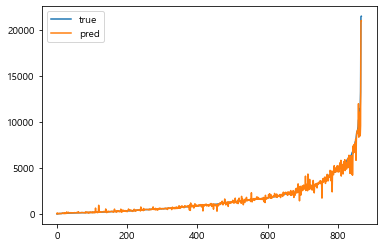

In [11]:
valid_predict_random.sort_values('true').reset_index()[['true', 'pred']].plot()

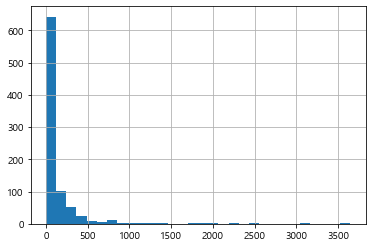

In [12]:
valid_predict_random['error'].hist(bins = 30)
plt.show()

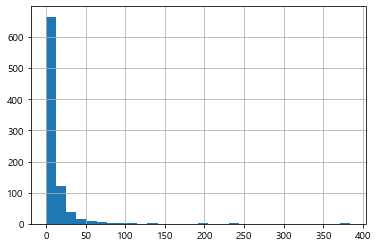

In [13]:
valid_predict_random['error_percent'].hist(bins = 30)
plt.show()

# 2. 홍수사상번호 split

## Train Test Split

In [14]:
hongsu_idx = list(data['홍수사상번호'].unique())
random.seed(random_seed)
valid_hongsu_idx = random.sample(hongsu_idx, k= int(len(hongsu_idx)*0.3))

In [15]:
train = data[~data['홍수사상번호'].isin(valid_hongsu_idx)]
valid = data[data['홍수사상번호'].isin(valid_hongsu_idx)]

y_train_idx = train[y_col]
X_train_idx = train.drop(columns=[y_col]+PK_col)

y_valid_idx = valid[y_col]
X_valid_idx = valid.drop(columns=[y_col]+PK_col)

print(f"train shape : {X_train_idx.shape} valid shape : {X_valid_idx.shape}")

train shape : (1929, 42) valid shape : (962, 42)


## 예측

In [16]:
xgb = XGBRegressor()
xgb.fit(X_train_idx, y_train_idx)

pred_valid_idx = xgb.predict(X_valid_idx)

valid_predict_idx = pd.DataFrame(columns=['true', 'pred'])
valid_predict_idx['true'] = y_valid_idx.values
valid_predict_idx['pred'] = pred_valid_idx
valid_predict_idx['error'] = abs(valid_predict_idx['true'] - valid_predict_idx['pred'])
valid_predict_idx['error_percent'] = valid_predict_idx['error'] / valid_predict_idx['true'] * 100

In [17]:
valid_predict_idx.head()

,true,pred,error,error_percent
0,189.10,116.68,72.42,38.30
1,216.95,119.43,97.52,44.95
2,251.42,119.43,131.99,52.50
3,302.81,205.85,96.97,32.02
4,384.78,218.41,166.37,43.24


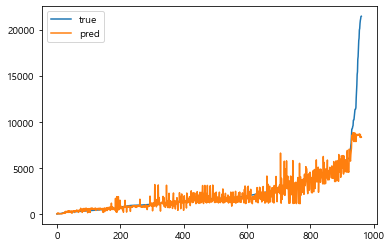

In [18]:
valid_predict_idx.sort_values('true').reset_index()[['true', 'pred']].plot()

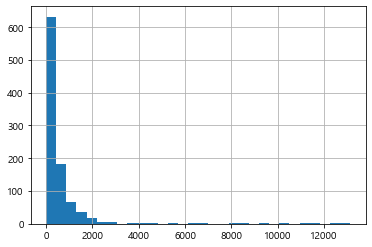

In [19]:
valid_predict_idx['error'].hist(bins = 30)
plt.show()

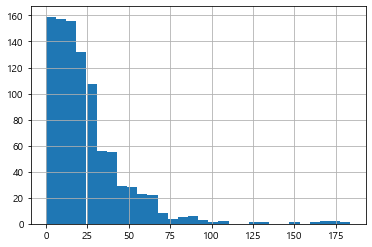

In [20]:
valid_predict_idx['error_percent'].hist(bins = 30)
plt.show()

# 평가

In [21]:
from sklearn.metrics import mean_squared_error

In [26]:
mse_random = mean_squared_error(y_valid_random, pred_valid_random)
mse_idx = mean_squared_error(y_valid_idx, pred_valid_idx)

print(f"Mean Squared Error Random : {mse_random:.2f} idx : {mse_idx:.2f}")

Mean Squared Error Random : 111854.05 idx : 2167162.55
